# Bagging

This notebook implements Bagging, whose key idea is the reduction in variance of the model (like with all Ensemble Methods). Bagging is useful because each model is trained on a different dataset since they’re bootstrapped. So inevitably, each model will make different mistakes, and have a distinct error and variance. Both the error and variance get reduced in the aggregation step where they are averaged out. To illustrate Bagging, I will once again use the palmer_penguins dataset and compare the performance between a single decision tree model and a bagging classifier of many depth 1 decision trees, or decision stumps.

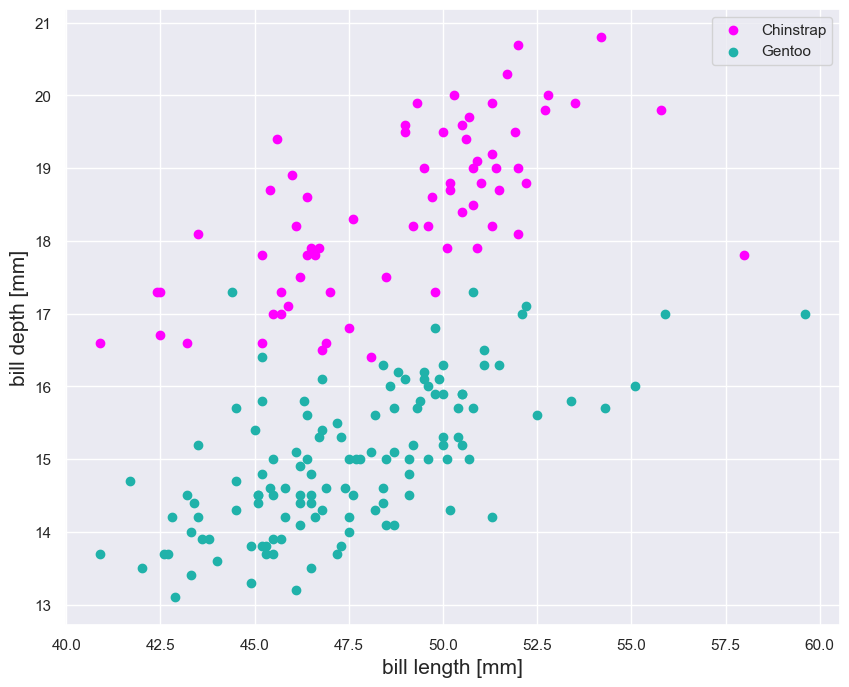

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
penguins = pd.read_csv("Datasets/palmer_penguins.csv")
penguins = penguins.iloc[151:]

X = penguins[["bill_length_mm", "bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Chinstrap":
        return 0
    else:
        return 1

# Create target value array
y = penguins["species"].map(make_labels).to_numpy()

# Plot the data
penguin = ["Chinstrap", "Gentoo"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguin, colors):
    temp_df = penguins[penguins.species == species]
    ax.scatter(temp_df.bill_length_mm, temp_df.bill_depth_mm, c = color, label = species)
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

In [2]:
# import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# import ensemble method 
from sklearn.ensemble import VotingClassifier

# split training data 
from sklearn.model_selection import train_test_split

# import metric 
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 9)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators=[("lr", log_clf), ("rf", rnd_clf), ("svm", svm_clf)], voting = "hard")

svm_clf.fit(X_train, y_train)
svm_y_predict = svm_clf.predict(X_test)
print(f"svm accuracy: {accuracy_score(y_test, svm_y_predict)}")

log_clf.fit(X_train, y_train)
log_y_predict = log_clf.predict(X_test)
print(f"logistic regression accuracy: {accuracy_score(y_test, log_y_predict)}")

rnd_clf.fit(X_train, y_train)
rnd_y_predict = rnd_clf.predict(X_test)
print(f"random forest accuracy: {accuracy_score(y_test, rnd_y_predict)}")

voting_clf.fit(X_train, y_train)
y_predict = voting_clf.predict(X_test)
print(f"voting classifier accuracy: {accuracy_score(y_test, y_predict)}")

svm accuracy: 0.8961038961038961
logistic regression accuracy: 0.961038961038961
random forest accuracy: 0.948051948051948
voting classifier accuracy: 0.961038961038961


In [3]:
# import metrics
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 6)

stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        29
           1       1.00      0.94      0.97        48

    accuracy                           0.96        77
   macro avg       0.95      0.97      0.96        77
weighted avg       0.96      0.96      0.96        77
 

Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.96      1.00      0.98        48

    accuracy                           0.97        77
   macro avg       0.98      0.97      0.97        77
weighted avg       0.98      0.97      0.97        77
 



In [4]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), n_estimators = 500, bootstrap = True, n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        29
           1       0.88      0.96      0.92        48

    accuracy                           0.90        77
   macro avg       0.90      0.88      0.89        77
weighted avg       0.90      0.90      0.89        77
 



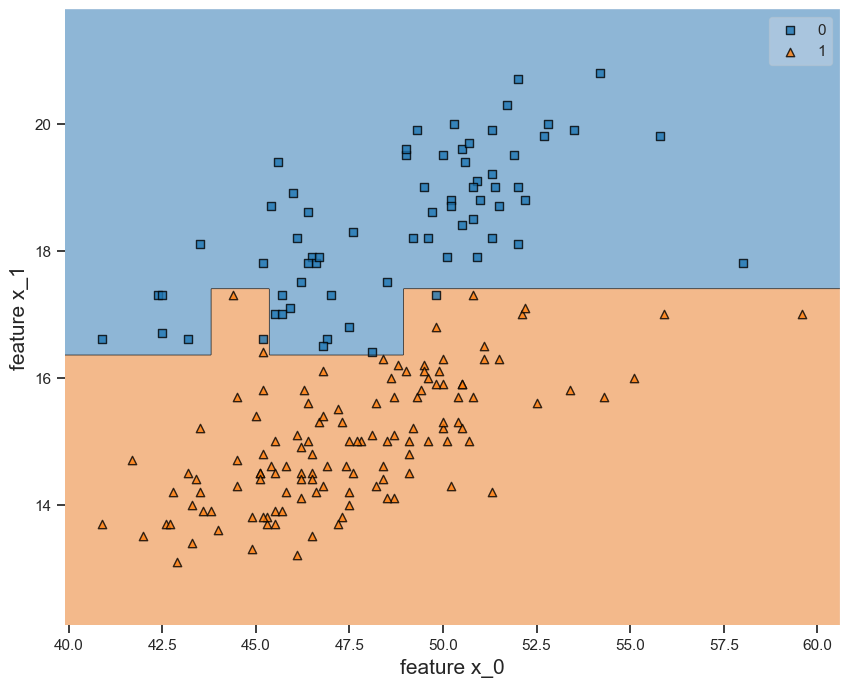

In [5]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

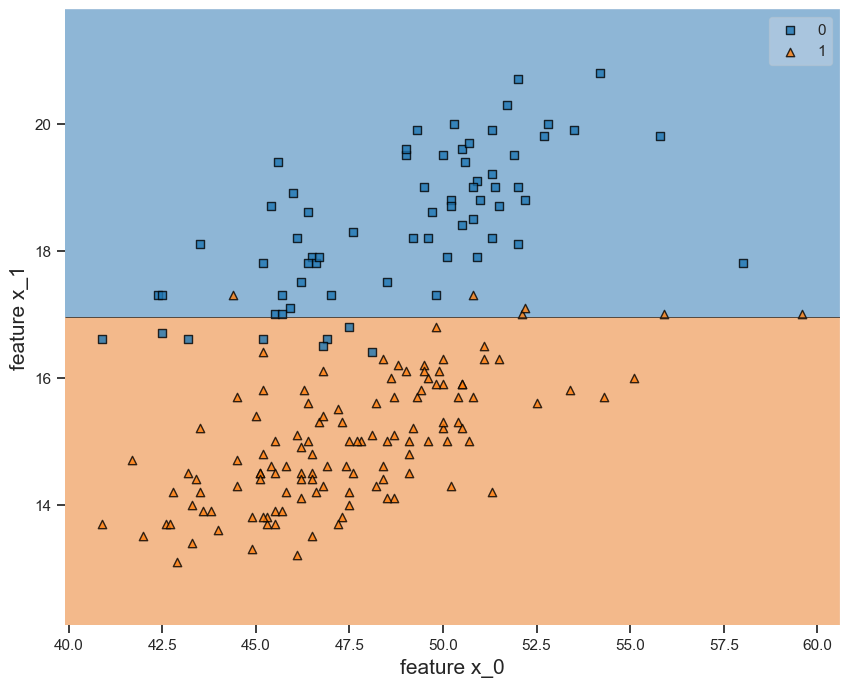

In [6]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()